In [12]:
import os
import csv
import pandas as pd
import numpy as np

import re
import datetime
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import squarify
import networkx as nx

from sklearn import model_selection, preprocessing, metrics
plt.style.use('fivethirtyeight')

print(os.getcwd())
print(os.listdir("../"))

/Users/vishakhadudani/APR1
['Untitled Folder', '.Directory-1534269790', 'APR1', 'Music', '.condarc', 'Untitled1.ipynb', '.DS_Store', 'nltk_data', 'arxiv.json', 'settings.cfg', '.CFUserTextEncoding', 'mag_2015_processed.csv', 'midterm-2-takehome.pdf', 'arxiv.csv', 'Untitled.ipynb', "NLP-Paper - CNN'.pdf", '.local', 'Creative Cloud Files', 'Pictures', 'sampleTensorFlow', 'Test_tensor.ipynb', 'processed_data.csv', '2008.json', '.ipython', 'Desktop', 'Library', '.matplotlib', 'test.py', '.oracle_jre_usage', 'MS SBU', 'Online Return Center.pdf', 'Test-Notebook.ipynb', 'MAG_processed-20181207T192808Z-002.zip', '.bash_sessions', 'Word_cloud_nlp.png', 'untitled.txt', '.bash_profile-anaconda2.bak', 'Public', 'NLP2014Paper.pdf', 'examples', 'vector_plit.png', '.anaconda', 'BF00367750.pdf', 'APR', 'Movies', 'Applications', 'result.csv', '.Trash', '.ipynb_checkpoints', '.jupyter', '.keras', 'helloworld.py', 'Documents', 'venv', 'nyc-taxi-fare-prediction.ipynb', 'mag_2018.csv', '.bash_profile', 'da

In [13]:
df = pd.read_csv('../processed_data.csv')

In [14]:
df.shape

(1435910, 21)

In [69]:
len(D2)

15

In [84]:
import itertools
D2=dict(itertools.islice(adj_list.items(),5))
D2

{2014935324.0: [1760544772,
  2121772044,
  2060724751,
  1508186648,
  2102415385,
  2017713688,
  263553050,
  2079854619,
  2035743770,
  2103480351,
  2092831789,
  2113467957,
  2084630589,
  2037915714,
  2148903494,
  2072542791,
  2140720209,
  1984447059,
  2058122340,
  2096285801,
  2054921835,
  1992935537,
  2125284466,
  2012304502,
  2476433526,
  2088599176,
  2050949257,
  2022581387,
  2072923279,
  2153101972,
  2047986838,
  2072020654,
  2101977779,
  2139754676,
  2137405619,
  2087687862,
  1491016379,
  2008138427,
  2070716620,
  2114171596,
  2087980253,
  1980512989,
  2026237155,
  2094679283,
  2028260084,
  2033121022,
  1977838850,
  2057008393,
  1970565395,
  1983977749,
  2052976411,
  1991855909,
  2037012265,
  2088498991,
  2088485687,
  1998521147,
  2074757955,
  2010724164,
  1986583880,
  2143841618,
  2030126423,
  2118492507,
  2032490333,
  1988829538,
  2080870246,
  2018317672,
  2092377962,
  2148226925,
  1997613934,
  2058323824,
  20119

In [88]:
adj_list = {}
for key,row in df.iterrows():
    curr_list = adj_list.get(row[0], [])
    curr_list.extend(map(int,re.findall(r'\d+', df["References"][0])))
    curr_list = list(set(curr_list))
    adj_list[row[0]] = curr_list
adj_list

KeyboardInterrupt: 

In [32]:
outlink_map = {}
inlink_map = {}
numrows = 0
df_new = df[df["References"].notnull()]
for index, row in df_new.iterrows():
    if numrows<100:
        numrows+=1
        ref = row["References"]
        ref_list = list(map(int,ref.strip("[]'").split(",")))
        for ref in ref_list:
            listi = inlink_map.get(ref, [])
            listi.append(row["Id"])
            inlink_map[ref] = listi

KeyboardInterrupt: 

In [51]:
rev_adj_list = {}
for key, nodes in D2.items():
    for n in nodes:
        curr_list = rev_adj_list.get(n, [])
        curr_list.append(key)
        curr_list = list(set(curr_list))
        rev_adj_list[n] = curr_list

In [52]:
len(rev_adj_list)

92

In [25]:
def get_reach(id):
    nodes_list = rev_adj_list[id]
    temp_list = []
    result_list = []
    for i in range(3):
        for n in nodes_list:
            if n in rev_adj_list:
                temp_list.extend(rev_adj_list[n])
            result_list.append(n)
        nodes_list = list(set(temp_list) - set(result_list)-set([id]))
    return len(result_list)

In [31]:
get_reach(2148226925)

100

In [147]:
node_sizes = []
_labels = {}
for i in range(2,250):
    _labels[i] = i
    node_sizes.append( 4 * i )

import networkx as nx
G = nx.Graph()
count =0
for key, nodes in D2.items():
    
    for i,n in enumerate(nodes):
        if count < 250:
            count+=1
            if n not in G:
                G.add_node(n)
            if key not in G:
                G.add_node(key)
            if not G.has_edge(key,n) or not G.has_edge(key,n):
                G.add_edge(key, n)

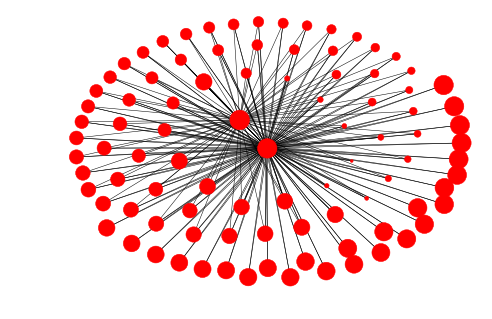

In [161]:
# pos = nx.random_layout(G,dim=2)

nx.draw_kamada_kawai(G,labels=_labels, with_labels=False, node_size = node_sizes, width =  0.5)
# nx.draw(G, with_labels=True, labels=_labels)
plt.draw()
plt.show()

In [160]:
list(nx.connected_components(G))

[{263553050,
  1491016379,
  1508186648,
  1598581722,
  1633731518,
  1760544772,
  1965319603,
  1970565395,
  1977838850,
  1980512989,
  1983208835,
  1983421851,
  1983977749,
  1984447059,
  1986583880,
  1988829538,
  1991855909,
  1992935537,
  1997613934,
  1998521147,
  2008138427,
  2010724164,
  2011918196,
  2012304502,
  2014935324.0,
  2017713688,
  2018317672,
  2022235068,
  2022581387,
  2022877146,
  2026237155,
  2028260084,
  2030126423,
  2031165376,
  2032276957,
  2032490333,
  2033121022,
  2035743770,
  2037012265,
  2037915714,
  2047986838,
  2050949257,
  2052976411,
  2054921835,
  2057008393,
  2058122340,
  2058323824,
  2060724751,
  2068824512,
  2070716620,
  2072020654,
  2072542791,
  2072923279,
  2074757955,
  2076037500,
  2079854619,
  2080870246,
  2081362853,
  2084630589,
  2087687862,
  2087980253,
  2088485687,
  2088498991,
  2088599176,
  2092377962,
  2092831789,
  2094679283,
  2096285801,
  2101893110,
  2101977779,
  2102415385,
  210